### Multiple linear regression

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
model = LinearRegression(n_jobs=-1)

In [34]:
# Create a DataFrame with two features and one output label
# Define the data manually with linear relationships for multiple linear regression

# Set random seed for reproducibility
np.random.seed(42)

# Create linear features f1 and f2 on DIFFERENT SCALES
# This demonstrates the importance of normalization/standardization
data = {
    # Feature 1: Values on a small scale (0.5 to 5.0) - manually added for randomness
    'f1': [1.2, 2.5, 3.8, 4.5, 1.5, 2.1, 3.4, 4.2, 0.8, 1.5, 
           2.8, 3.3, 4.7, 1.6, 2.3, 3.8, 4.5, 2.1, 1.8, 2.2,
           3.5, 4.2, 1.8, 2.7, 3.3, 4.8, 1.3, 1.6, 2.9, 4.4,
           1.1, 2.4, 3.1, 4.6, 1.7, 2.0, 3.1, 4.6, 0.5, 1.8,
           2.5, 3.9, 4.4, 1.9, 2.6, 3.9, 4.8, 1.9, 3.2, 4.7,
           1.4, 2.7, 3.6, 4.9, 1.2, 2.7, 3.4, 4.6, 2.1, 3.4,
           4.3, 1.4, 2.9, 3.6, 4.0, 4.8, 1.7, 3.0, 4.1, 1.3,
           2.6, 3.9, 4.2, 1.3, 2.4, 3.7, 5.0, 2.5, 3.1, 4.9,
           2.3, 3.2, 4.0, 1.7, 3.0, 4.3, 0.5, 1.1, 2.8, 4.5,
           1.0, 2.4, 3.8, 1.9, 3.3, 4.7, 2.1, 3.5, 4.9, 2.5],
    
    # Feature 2: Values on a large scale (1000 to 5000) - manually added for randomness
    'f2': [1200, 1800, 2400, 2900, 3200, 3800, 4100, 4500, 4800, 1500,
           1900, 2200, 2700, 3100, 3600, 4000, 4400, 4700, 1100, 1700,
           2100, 2600, 3000, 3500, 3900, 4300, 4600, 5000, 1400, 1800,
           2300, 2800, 3300, 3700, 4200, 4500, 4900, 1300, 1600, 2000,
           2500, 2900, 3400, 3800, 4100, 4600, 4800, 1200, 1700, 2200,
           2700, 3200, 3600, 4000, 4400, 4700, 1000, 1500, 2000, 2500,
           3000, 3500, 4000, 4500, 5000, 1400, 1900, 2400, 2800, 3300,
           3700, 4200, 4600, 1100, 1600, 2100, 2600, 3100, 3600, 4100,
           4500, 4900, 1300, 1800, 2300, 2700, 3200, 3700, 4200, 4700,
           1200, 1700, 2200, 2700, 3100, 3600, 4100, 4600, 5000, 1500]
}

# Create y with a linear relationship: y = 2*f1 + 0.5*f2 + noise
# This makes it suitable for multiple linear regression
# Adding Gaussian noise for realism (mean=0, std=50)
noise = np.random.normal(0, 50, 100)
data['y'] = [2*f1 + 0.5*f2 + n for f1, f2, n in zip(data['f1'], data['f2'], noise)]

# Create DataFrame from the data dictionary
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()

,f1,f2,y
0,1.2,1200,627.235708
1,2.5,1800,898.086785
2,3.8,2400,1239.984427
3,4.5,2900,1535.151493
4,1.5,3200,1591.292331


In [35]:
df.describe()

,f1,f2,y
count,100.000000,100.00000,100.000000
mean,2.960000,3087.00000,1544.227674
std,1.223259,1186.85179,594.657009
min,0.500000,1000.00000,464.839124
25%,1.900000,2075.00000,1021.126787
50%,2.950000,3100.00000,1538.522112
75%,4.000000,4100.00000,2071.532508
max,5.000000,5000.00000,2548.626291


In [36]:
df.corr()

,f1,f2,y
f1,1.000000,0.142614,0.145185
f2,0.142614,1.000000,0.997077
y,0.145185,0.997077,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      100 non-null    float64
 1   f2      100 non-null    int64  
 2   y       100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [37]:
# check null values
df.isnull().sum()

f1    0
f2    0
y     0
dtype: int64

In [38]:
# checking null values
df[df.isnull().any(axis=1)]

,f1,f2,y


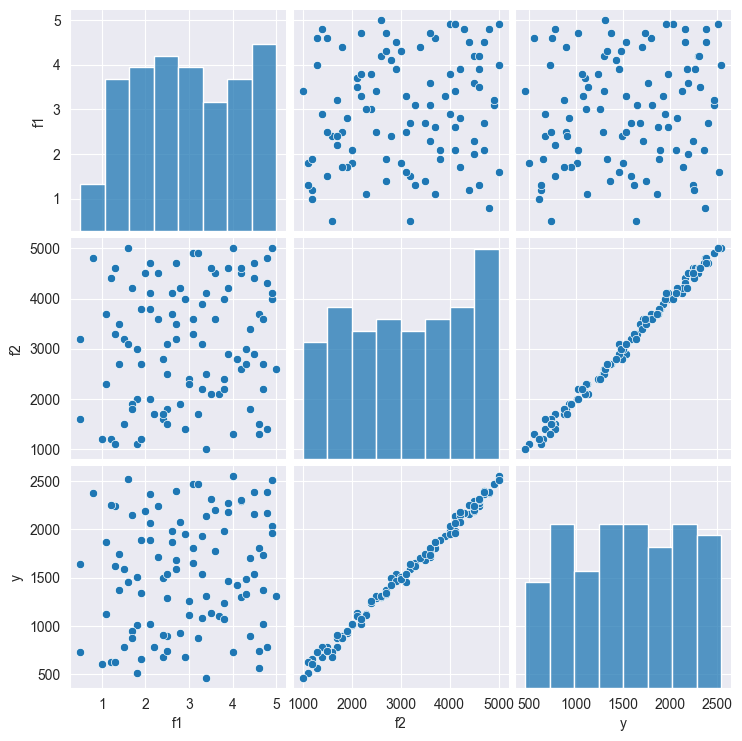

In [43]:
sns.pairplot(df)

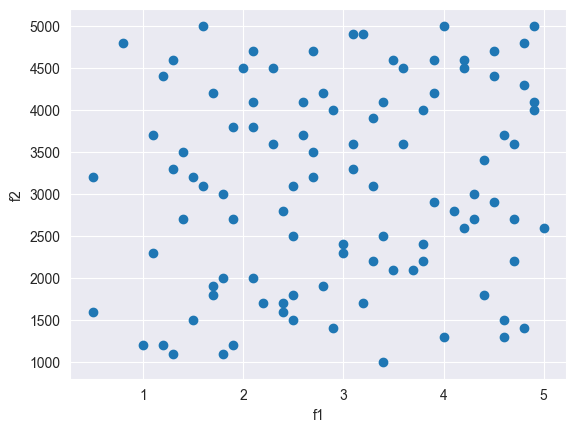

<Figure size 1000x600 with 0 Axes>

In [44]:
plt.scatter(x='f1', y='f2', data=df)
plt.xlabel('f1')
plt.ylabel('f2')
plt.figure(figsize=(10,6))
plt.show()

In [45]:
# independent and dependent variables
X = df[['f1', 'f2']]
y = df['y']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (100, 2)
y shape: (100,)


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (75, 2)
X_test shape: (25, 2)
y_train shape: (75,)
y_test shape: (25,)


<Axes: xlabel='f1', ylabel='f2'>

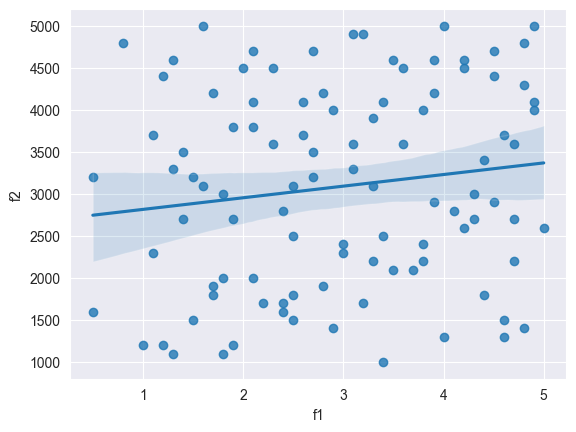

In [52]:
sns.regplot(x='f1', y='f2', data=df)

In [54]:
# normalization
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

print(f'X_train_scale shape: {X_train_scale.shape}')
print(f'X_test_scale shape: {X_test_scale.shape}')

X_train_scale shape: (75, 2)
X_test_scale shape: (25, 2)


In [59]:
# 3-fold cross validation
cv_scores = cross_val_score(model, X_train, y_train, cv=3)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99431438 0.99509582 0.98541026]
Average cross-validation score: 0.9916068193568757


In [60]:
model.fit(X_train_scale, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [61]:
# check the test score
test_score = model.score(X_test_scale, y_test)

In [62]:
print(f'Test score: {test_score:.3f}')

Test score: 0.995


In [63]:
# prediction
y_pred = model.predict(X_test_scale)
y_pred

array([ 897.02993837, 2004.41735403, 1851.37813572, 2304.39034887,
       2052.08697059,  997.49338155, 1499.26546873, 2252.46872822,
        948.4064303 ,  595.42155734,  545.8985031 , 1147.26182748,
        545.35337437, 1853.55865064,  595.20350585, 1599.29280893,
       1302.04545773, 1550.20585767, 1351.89558921, 1399.56520577,
       2353.25924864, 2102.4822308 , 2301.55567948, 1702.80897299,
       1649.25196615])

In [64]:
coeff = model.coef_
intercept = model.intercept_

print(f'coefficients: {coeff}')
print(f'intercept: {intercept}')

coefficients: [  1.27422861 596.05755711]
intercept: 1560.2191560545639


In [65]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, model.predict(X_test_scale))
mae = mean_absolute_error(y_test, model.predict(X_test_scale))
r2 = r2_score(y_test, model.predict(X_test_scale))
adjusted_r2 = 1 - (1 - r2) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

print('mse:', mse)
print('mae:', mae)
print('r2:', r2)
print('adjusted r2:', adjusted_r2)

mse: 1553.7069583333296
mae: 30.957343405595374
r2: 0.9952126015310248
adjusted r2: 0.9947773834883906


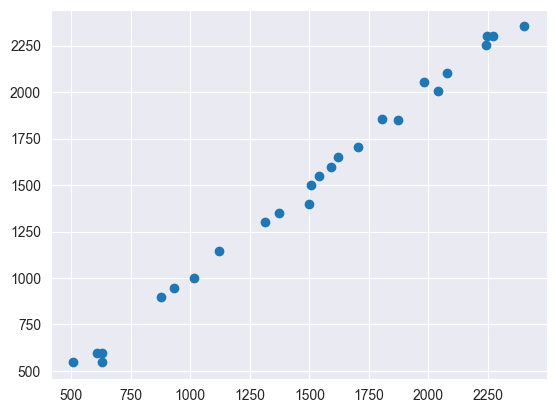

In [66]:
plt.scatter(x=y_test, y=y_pred)

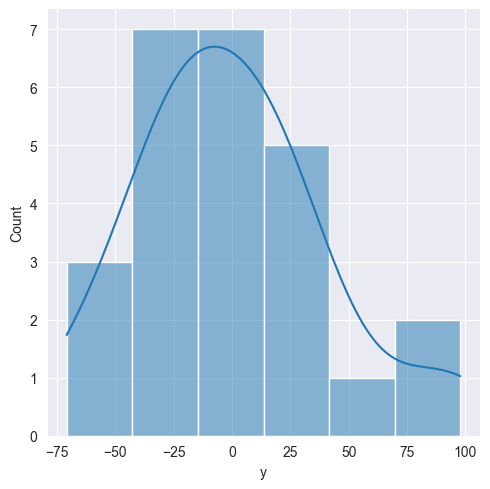

In [73]:
residual = y_test - y_pred
sns.displot(residual, kde=True)

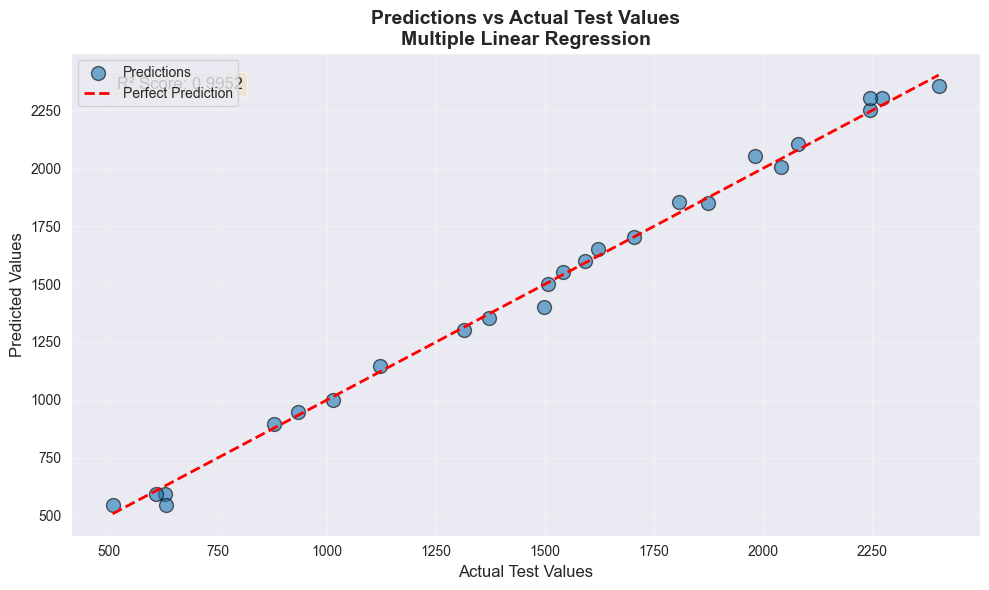

In [74]:
# Plot predictions against actual test values
plt.figure(figsize=(10, 6))

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=100, label='Predictions')

# Add perfect prediction line (y=x)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Test Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Predictions vs Actual Test Values\nMultiple Linear Regression', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)

# Add R² score as text on plot
plt.text(0.05, 0.95, f'R² Score: {r2:.4f}', 
         transform=plt.gca().transAxes, 
         fontsize=12, 
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()